In [77]:
#Посилання на GitHub: 


import pandas as pd
import numpy as np

#Завантажуємо таблицю
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"


data = pd.read_html(url, header=0)[2]

In [78]:
#1.	Виведіть перші 5 рядків таблиці.
df_1 = data.head(5)

print(df_1)

    Рік В національній валюті В доларах США  \
0  1992              5832,88▲        28,04▼   
1  1993               163533▲        36,03▲   
2  1994              1426343▲        44,99▲   
3  1995              7304000▲        49,53▲   
4  1996               125,23▼        68,45▲   

  Кількість кг хліба[20] на середню зарплату  \
0                                   1015,67▲   
1                                    430,42▼   
2                                    372,76▼   
3                                    201,76▼   
4                                    198,62▼   

  Кількість БігМаків на середню зарплату  
0                                      —  
1                                      —  
2                                      —  
3                                      —  
4                                      —  


In [79]:
#2.Визначте кількість рядків і стовпчиків за допомогою атрибуту shape
num_rows, num_columns = data.shape
print(f"Кількість рядків: {num_rows}, Кількість стовпчиків: {num_columns}")


Кількість рядків: 32, Кількість стовпчиків: 5


In [80]:
#3.Визначте загальну кількість років та кількість місяців у даних.
num_years = len(data['Рік']) - 1  # віднімання 1, оскільки перший стовпець - назва
num_months = num_years*12  
print("Загальна кількість років =", num_years)
print("Загальна кількість місяців =", num_months)

Загальна кількість років = 31
Загальна кількість місяців = 372


In [81]:
#4.Замінити пропущені значення  «-» в таблиці на NaN
data = data.rename(columns={
    "Рік": "Year",
    "В національній валюті": "Salary in UAH",
    "В доларах США": "Salary in USD",
    "Кількість кг хліба[20] на середню зарплату": "Bread per Salary",
    "Кількість БігМаків на середню зарплату": "BigMacs per Salary"
})
data = data.replace("—", np.nan)
data

,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
0,1992,"5832,88▲","28,04▼","1015,67▲",NaN
1,1993,163533▲,"36,03▲","430,42▼",NaN
2,1994,1426343▲,"44,99▲","372,76▼",NaN
3,1995,7304000▲,"49,53▲","201,76▼",NaN
4,1996,"125,23▼","68,45▲","198,62▼",NaN
5,1997,"143,09▲","76,86▲","211,13▲",20[21]
6,1998,"152,83▲","62,39▼","177,69▼",н.д.
7,1999,"177,39▲","42,95▼","180,68▲",24▲[22]
8,2000,"231,04▲","42,47▼","117,51▼",н.д.
9,2001,"311,62▲","58,01▲","153,57▲",50▲[23]


In [82]:
#5.Визначити тип стовпців за допомогою dtypes.
column_types = data.dtypes
print("Типи стовпців:")
print(column_types)

Типи стовпців:
Year                  object
Salary in UAH         object
Salary in USD         object
Bread per Salary      object
BigMacs per Salary    object
dtype: object


In [83]:
#6.Видаліть передостанній і останній стовпчики ( Кількість кгхліба[20] на середнюзарплату,
#Кільксть БігМаків на середню зарплату). Далі працюйте з оновленою таблицею. 


data = data.drop(columns=["Bread per Salary"])
data = data.drop(columns=["BigMacs per Salary"])
data

,Year,Salary in UAH,Salary in USD
0,1992,"5832,88▲","28,04▼"
1,1993,163533▲,"36,03▲"
2,1994,1426343▲,"44,99▲"
3,1995,7304000▲,"49,53▲"
4,1996,"125,23▼","68,45▲"
5,1997,"143,09▲","76,86▲"
6,1998,"152,83▲","62,39▼"
7,1999,"177,39▲","42,95▼"
8,2000,"231,04▲","42,47▼"
9,2001,"311,62▲","58,01▲"


In [84]:
#Видаляємо * в 2022* і 2023*
data["Year"] = data["Year"].str.replace("*", "")
data["Year"] = data["Year"].astype(int)

data

C:\Users\Admin\AppData\Local\Temp\ipykernel_5168\3525929739.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Year"] = data["Year"].str.replace("*", "")


,Year,Salary in UAH,Salary in USD
0,1992,"5832,88▲","28,04▼"
1,1993,163533▲,"36,03▲"
2,1994,1426343▲,"44,99▲"
3,1995,7304000▲,"49,53▲"
4,1996,"125,23▼","68,45▲"
5,1997,"143,09▲","76,86▲"
6,1998,"152,83▲","62,39▼"
7,1999,"177,39▲","42,95▼"
8,2000,"231,04▲","42,47▼"
9,2001,"311,62▲","58,01▲"


In [85]:
#Видаляємо трикутники для подальшої роботи з таблицею
data["Salary in UAH"] = data["Salary in UAH"].str.replace('▲', "").str.replace('▼', "")
data["Salary in USD"] = data["Salary in USD"].str.replace('▲', "").str.replace('▼', "")
data

,Year,Salary in UAH,Salary in USD
0,1992,"5832,88","28,04"
1,1993,163533,"36,03"
2,1994,1426343,"44,99"
3,1995,7304000,"49,53"
4,1996,"125,23","68,45"
5,1997,"143,09","76,86"
6,1998,"152,83","62,39"
7,1999,"177,39","42,95"
8,2000,"231,04","42,47"
9,2001,"311,62","58,01"


In [86]:
#7. Перетворіть тип даних на числовий
data['Salary in UAH'] = data['Salary in UAH'].str.replace(',', '.').astype(float)
data['Salary in USD'] = data['Salary in USD'].str.replace(',', '.').astype(float)

data

,Year,Salary in UAH,Salary in USD
0,1992,5832.88,28.04
1,1993,163533.00,36.03
2,1994,1426343.00,44.99
3,1995,7304000.00,49.53
4,1996,125.23,68.45
5,1997,143.09,76.86
6,1998,152.83,62.39
7,1999,177.39,42.95
8,2000,231.04,42.47
9,2001,311.62,58.01


In [87]:
data.dtypes

Year               int32
Salary in UAH    float64
Salary in USD    float64
dtype: object

In [88]:
#8. Порахуйте частку пропусків в кожній колонці (за допомогою методів isnull , sum, len)  
df = pd.DataFrame(data)
missing_percentage = df.isnull().sum() / len(df)
print("Частка пропусків по стовпцям:")
print(missing_percentage)

Частка пропусків по стовпцям:
Year             0.0
Salary in UAH    0.0
Salary in USD    0.0
dtype: float64


In [89]:
#9. Замініть всі пропущені значення на середні значення по (стовпцю).
df_filled = df.fillna(df.mean())
print(df_filled)

    Year  Salary in UAH  Salary in USD
0   1992        5832.88          28.04
1   1993      163533.00          36.03
2   1994     1426343.00          44.99
3   1995     7304000.00          49.53
4   1996         125.23          68.45
5   1997         143.09          76.86
6   1998         152.83          62.39
7   1999         177.39          42.95
8   2000         231.04          42.47
9   2001         311.62          58.01
10  2002         375.98          70.59
11  2003         462.58          86.74
12  2004         590.53         111.02
13  2005         806.14         157.30
14  2006        1042.88         206.51
15  2007        1352.75         267.87
16  2008        1808.92         343.43
17  2009        1909.25         245.05
18  2010        2246.75         283.12
19  2011        2639.17         331.24
20  2012        3031.92         379.42
21  2013        3273.82         409.59
22  2014        3474.75         292.32
23  2015        4207.33         162.60
24  2016        5187.33  

In [90]:
#10. Знайдіть рік з найвищою зарплатою в Україні в грн і вкажіть цю зарплату.

high_pay = df["Salary in UAH"].max()
high_pay_year = df.loc[df["Salary in UAH"] == high_pay, "Year"].values[0]

print(f"Рік з найвищою зарплатою в Україні: ", high_pay_year)
print(f"Зарплата: ", high_pay, "грн")

Рік з найвищою зарплатою в Україні:  1995
Зарплата:  7304000.0 грн


In [91]:
#11. Знайдіть рік з мінімальною  зарплатою в Україні в дол. США і вкажіть цю зарплату.
low_pay = df["Salary in UAH"].min()
low_pay_year = df.loc[df["Salary in UAH"] == low_pay, "Year"].values[0]


print(f"Рік з найнижчою зарплатою в Україні: ", low_pay_year)
print(f"Зарплата: ", low_pay, "грн")

Рік з найнижчою зарплатою в Україні:  1996
Зарплата:  125.23 грн


In [92]:
#12. Виведіть роки, коли зарплата в грн була вище середньої.

mean_pay = df["Salary in UAH"].mean()

mean_pay_year = df[df["Salary in UAH"] > mean_pay]["Year"]
print("Роки з зарплатою вище середньої:")
print(mean_pay_year)

Роки з зарплатою вище середньої:
2    1994
3    1995
Name: Year, dtype: int32


In [93]:
#13. Порівняйте  зарплату  в грн за останні два доступних роки. 
last_y = df.iloc[len(data)-2:len(data)]
print(last_y)
# Виберемо зарплати для останніх двох років
last_y_pay = last_y[last_y["Salary in UAH"] == last_y["Salary in UAH"]. min ()]

# Виведемо результат порівняння на екран
print(last_y_pay)
print("Нижча зарплата була в ", last_y_pay.iat[0,0], "році")

    Year  Salary in UAH  Salary in USD
30  2022       13376.21          380.0
31  2023       12954.12          327.7
    Year  Salary in UAH  Salary in USD
31  2023       12954.12          327.7
Нижча зарплата була в  2023 році


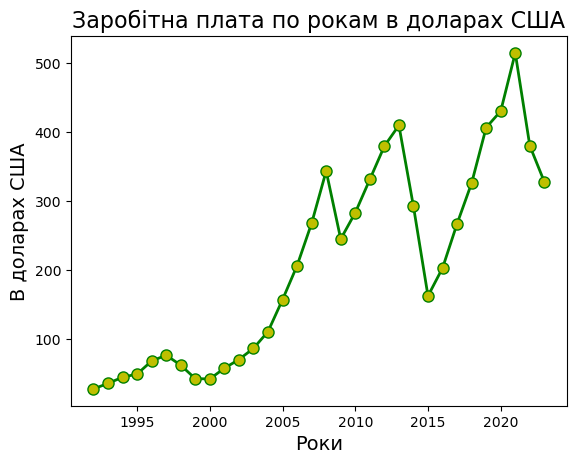

In [94]:
#14. Створіть графік, що відображає  зарплату в Україні з часом (за роками).
import matplotlib.pyplot as plt

x = df["Year"]
y = df["Salary in USD"]

plt.plot(x, y, "g", linestyle ="-",lw=2, marker="o", markersize=8, markerfacecolor="y")
plt.xlabel("Роки", fontsize=14)

plt.ylabel("В доларах США", fontsize=14)
plt.title("Заробітна плата по рокам в доларах США", fontsize=16)

plt.show() 

# Побудуємо графік

In [95]:
#15. Видаліть останній рік з таблиці та виведіть оновлену таблицю.
df = df.iloc[:-1]
df

,Year,Salary in UAH,Salary in USD
0,1992,5832.88,28.04
1,1993,163533.00,36.03
2,1994,1426343.00,44.99
3,1995,7304000.00,49.53
4,1996,125.23,68.45
5,1997,143.09,76.86
6,1998,152.83,62.39
7,1999,177.39,42.95
8,2000,231.04,42.47
9,2001,311.62,58.01


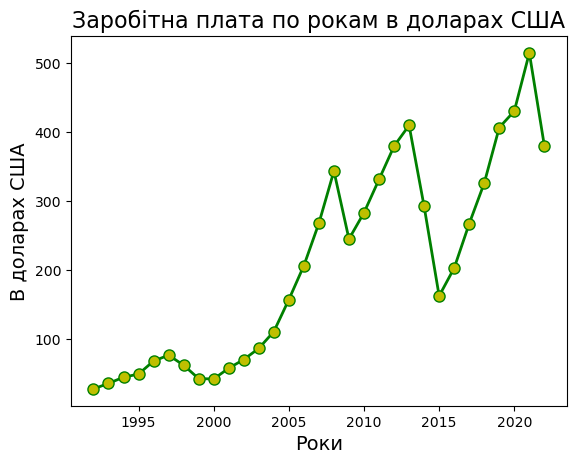

In [96]:
#16. Побудуйте графік, що відображає середню зарплату в Україні в розрізі років без останнього року.
x = df["Year"]
y = df["Salary in USD"]

plt.plot(x, y, "g", linestyle ="-",lw=2, marker="o", markersize=8, markerfacecolor="y")
plt.xlabel("Роки", fontsize=14)

plt.ylabel("В доларах США", fontsize=14)
plt.title("Заробітна плата по рокам в доларах США", fontsize=16)

plt.show()
# Побудуємо графік

In [97]:
#17. Обчисліть зарплату за останні два роки і порівняйте її із зарплатою за останні 5 років.
#Вкажіть, чи є різниця, і в якому напрямку.


df2 = df.iloc[len(df)-2:len(df)]
print(df2)
df5 = df.iloc[len(df)-5:len(df)]
print(df5)
print()

ser_2 = df2["Salary in UAH"].mean()
print("Середня заробітна плата за останні 2 роки: ", ser_2, "грн.")
ser_5 = df5["Salary in UAH"].mean()
print("Середня заробітна плата за останні 5 років:", ser_5, "грн.")

print("   ")
print("Висновок: середня заробітна плата за останні 5 років менша, ніж на останні 2 роки")

    Year  Salary in UAH  Salary in USD
29  2021       14017.80         514.41
30  2022       13376.21         380.00
    Year  Salary in UAH  Salary in USD
26  2018        8867.33         325.99
27  2019       10503.75         406.40
28  2020       11596.60         430.21
29  2021       14017.80         514.41
30  2022       13376.21         380.00

Середня заробітна плата за останні 2 роки:  13697.005 грн.
Середня заробітна плата за останні 5 років: 11672.338 грн.
   
Висновок: середня заробітна плата за останні 5 років менша, ніж на останні 2 роки
